## tensorflow 2.0 

In [2]:
pip install tensorflow

     |████████████████████████████████| 165.2 MB 9.6 MB/s 
     |████████████████████████████████| 127 kB 10.2 MB/s 
     |████████████████████████████████| 3.4 MB 9.6 MB/s 
     |████████████████████████████████| 459 kB 9.8 MB/s 
     |████████████████████████████████| 42 kB 2.5 MB/s 
     |████████████████████████████████| 6.8 MB 7.0 MB/s 
     |████████████████████████████████| 65 kB 3.0 MB/s 
     |████████████████████████████████| 1.3 MB 9.5 MB/s 
     |████████████████████████████████| 57 kB 2.5 MB/s 
     |████████████████████████████████| 114 kB 4.9 MB/s 
     |████████████████████████████████| 96 kB 5.3 MB/s 
     |████████████████████████████████| 779 kB 10.4 MB/s 
     |████████████████████████████████| 155 kB 11.8 MB/s 
     |████████████████████████████████| 47 kB 6.8 MB/s 
     |████████████████████████████████| 77 kB 7.2 MB/s 
     |████████████████████████████████| 147 kB 6.5 MB/s 
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4830 sha256

In [3]:
import numpy as np 
import tensorflow as tf

In [5]:
# create list
[1,2,3] , [[1,2,3], [1,2,3]]

([1, 2, 3], [[1, 2, 3], [1, 2, 3]])

In [6]:
# create array
# tuple이나 list 둘 다 np.array()로 씌워서 array를 만들 수 있음
arr = np.array([1,2,3])
arr.shape

(3,)

In [7]:
arr = np.array([[1,2,3], [1,2,3]])
arr.shape

(2, 3)

In [8]:
# create tensor
tf.constant([1,2,3])

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 2, 3], dtype=int32)>

In [10]:
tf.constant(((1,2,3), (1,2,3)))

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [1, 2, 3]], dtype=int32)>

In [11]:
arr = np.array([1,2,3])
tensor = tf.constant(arr)

In [15]:
tensor

<tf.Tensor: shape=(3,), dtype=int64, numpy=array([1, 2, 3])>

In [13]:
tensor.shape

TensorShape([3])

In [18]:
tensor.dtype  
# 주의 : tensor 생성할 떼도 data type을 정해주지 않기 때문에 data type에 대한 혼동이 올 수 있음
# data type에 따라 모델의 무게나 성능 차이에도 영향을 줄 수 있음

tf.int64

In [19]:
tensor = tf.constant([1,2,3], dtype=tf.float32)
tensor

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

In [22]:
# data type 변환
# numpy에서 astype()을 주었듯이, tensorflow에서는 tf.cast를 사용
tensor = tf.cast(tensor, dtype=tf.uint8)
tensor

<tf.Tensor: shape=(3,), dtype=uint8, numpy=array([1, 2, 3], dtype=uint8)>

In [23]:
# tensor에서 numpy 불러오기
tensor.numpy()

array([1, 2, 3], dtype=uint8)

In [24]:
np.array(tensor)

array([1, 2, 3], dtype=uint8)

In [25]:
type(tensor.numpy())

numpy.ndarray

### 난수 생성

In [27]:
# numpy에서는 normal distribution을 기본적으로 생성
np.random.randn(9)

array([ 0.09792714, -0.93659038, -1.79923129, -0.21117988,  0.42425527,
        0.74669625, -2.07203997,  1.52619607, -0.30994253])

In [28]:
tf.random.normal([3,3])

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[ 0.21911782,  0.54806197,  0.13229147],
       [ 0.82622975, -0.5879537 ,  0.5686174 ],
       [ 0.5036506 ,  0.62361   , -1.1949999 ]], dtype=float32)>

In [29]:
tf.random.uniform([4,4])

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[0.2851119 , 0.10598278, 0.2962941 , 0.6699748 ],
       [0.13338828, 0.46151257, 0.32295728, 0.72333896],
       [0.72425485, 0.26139832, 0.35412323, 0.9521762 ],
       [0.07673836, 0.794696  , 0.27123713, 0.7561394 ]], dtype=float32)>

## Data Process(MNIST)

In [30]:
# 데이터 불러오기
# tensorflow에서 제공해주는 MNIST
from tensorflow.keras import datasets

In [31]:
mnist = datasets.mnist

In [32]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [33]:
train_x.shape

(60000, 28, 28)

In [34]:
image = train_x[0]
image.shape

(28, 28)

In [36]:
import matplotlib.pyplot as plt 
%matplotlib inline

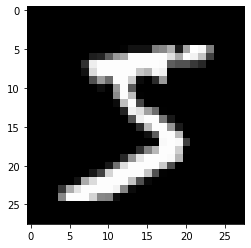

In [38]:
plt.imshow(image, 'gray')
plt.show()

In [39]:
# channel 관련
# [batch size, height, channel]
# gray scale이면 1, RGB이면 3으로 만들어줘야함

In [41]:
train_x.shape

(60000, 28, 28)

In [42]:
# 데이터 차원 수 늘리기 numpy
expanded_data = np.expand_dims(train_x, -1)
expanded_data.shape

(60000, 28, 28, 1)

In [44]:
# tensorflow 패키지 불러와 데이터 차원수 늘리기
new_train_x = tf.expand_dims(train_x, -1)
new_train_x.shape

TensorShape([60000, 28, 28, 1])

In [47]:
# new method
new_train_x = train_x[..., tf.newaxis]
new_train_x.shape

(60000, 28, 28, 1)

In [49]:
disp = new_train_x[0]
# 시각화 위해서 차원수 다시 줄여주기

disp = new_train_x[0, :, :, 0]
disp.shape

# 같음
disp = np.squeeze(new_train_x[0])

(28, 28)

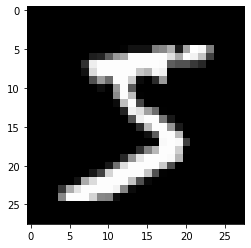

In [51]:
plt.imshow(disp, 'gray')
plt.show()

In [52]:
# label dataset 들여다보기
train_y.shape

(60000,)

In [53]:
train_y[0]

5

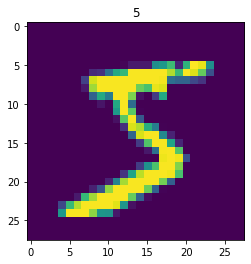

In [54]:
plt.title(train_y[0])
plt.imshow(disp)
plt.show()

In [55]:
# onehot encoding
# 컴퓨터가 이해할 수 있는 형태로 변환해서 label을 주도록 함
from tensorflow.keras.utils import to_categorical

In [56]:
to_categorical(1,10)

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [57]:
to_categorical(5,10)

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [58]:
label = train_y[0]

In [59]:
# label 확인해서 to_categorical 사용
label_onehot = to_categorical(label, num_classes=10)
label_onehot

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

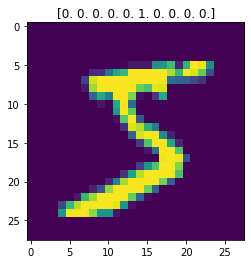

In [60]:
plt.title(label_onehot)
plt.imshow(disp)
plt.show()